##### 30-08-2022

# Exercise 1

## Basic image handling

1.- Importing relevant libraries

In [1]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

2.- Open an image

In [2]:
#Directory containing data and images
in_dir="data/"
#X-ray image
im_name="metacarpals.png"
#Read the image
#Here the directory and the image name is concatenated
#by "+" to give the full path to the image
im_org=io.imread(in_dir+im_name)

In [3]:
#check the image dimensions
print(im_org.shape)

(512, 512)


In [4]:
#check what type the pixels are
print(im_org.dtype)

uint8


3.- Display the image

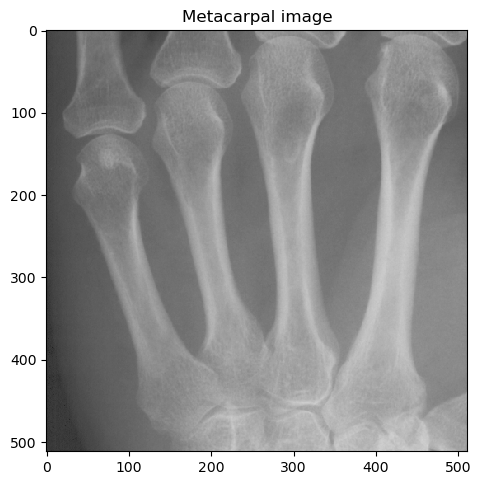

In [5]:
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

### Color Maps

4.- View the image with others color maps

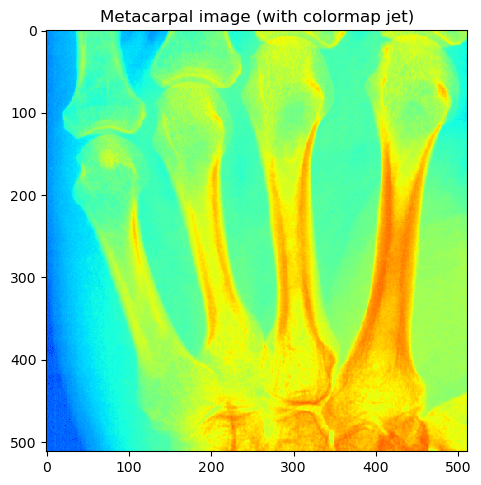

In [6]:
io.imshow(im_org,cmap="jet")
plt.title('Metacarpal image (with colormap jet)')
io.show()

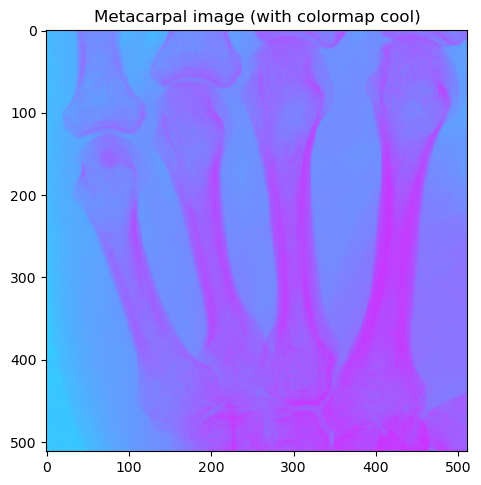

In [7]:
io.imshow(im_org,cmap="cool")
plt.title('Metacarpal image (with colormap cool)')
io.show()

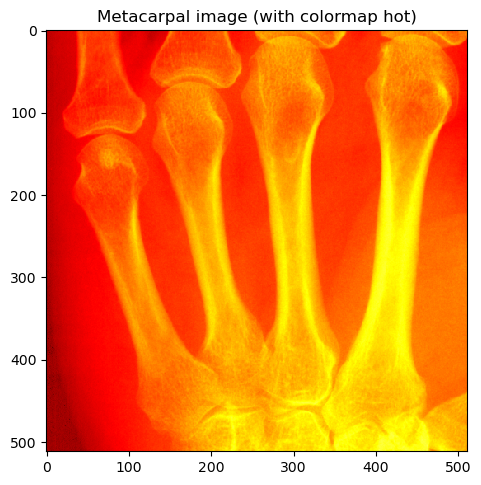

In [8]:
io.imshow(im_org,cmap="hot")
plt.title('Metacarpal image (with colormap hot)')
io.show()

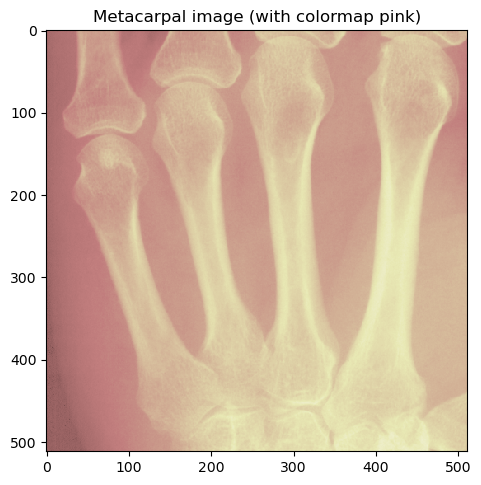

In [9]:
io.imshow(im_org,cmap="pink")
plt.title('Metacarpal image (with colormap pink)')
io.show()

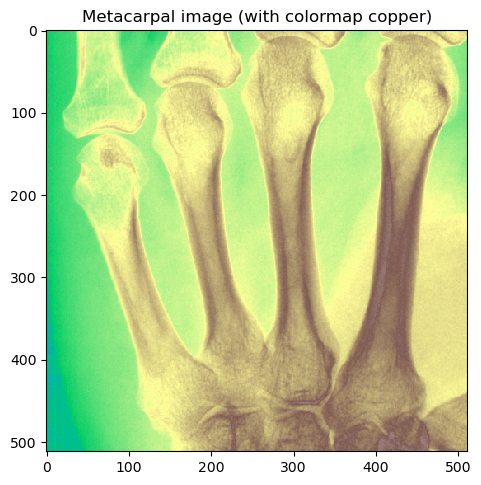

In [10]:
io.imshow(im_org,cmap="terrain")
plt.title('Metacarpal image (with colormap copper)')
io.show()

### Grey scale scaling

5.- Scale all black and all white

<function skimage.io._io.show()>

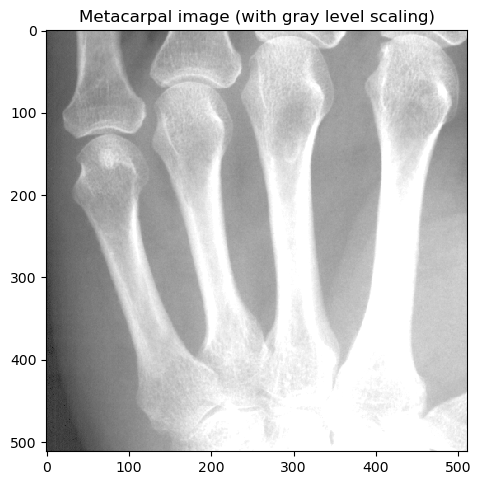

In [11]:
io.imshow(im_org, vmin=20, vmax=170)
plt.title('Metacarpal image (with gray level scaling)')
io.show

Pixels with values of 20 and below will be black, and pixels with values of 170 and above as white

6.- Automatically scale the visualization to white and black

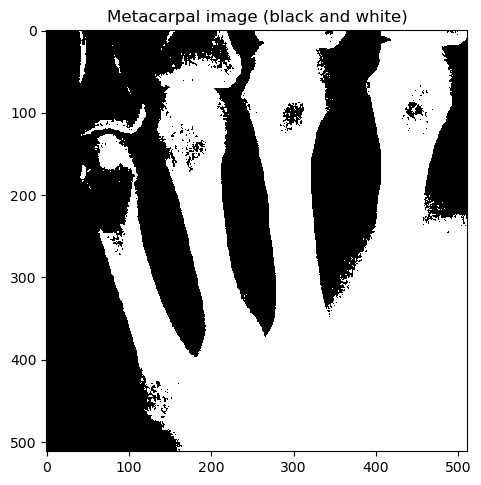

In [12]:
io.imshow(im_org,vmin=127, vmax=128)
plt.title('Metacarpal image (black and white)')
io.show()

### Histogram functions

7.- Compute and visualize the histogram of the image

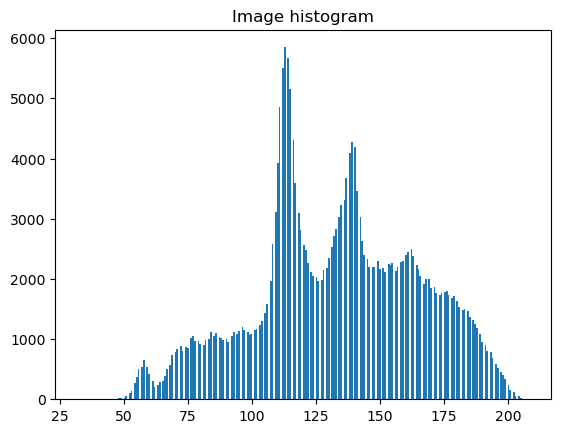

In [13]:
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

Function ravel is called to convert the image into a 1D array. It's possible to save the values of the histrogram:

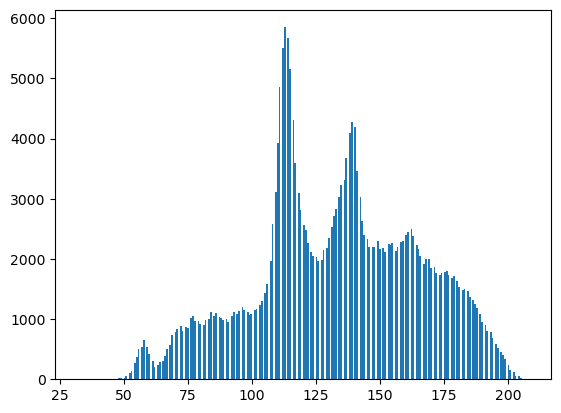

In [14]:
h=plt.hist(im_org.ravel(), bins=256)

The value of a given bin can be found by:

In [15]:
bin_no=100
count=h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")

There are 1147.0 pixel values in bin 100


Here h is a list of tuples, where in each tuple the first element is the bin count, and the second is the bin edges. So the bin edges can be found by:

In [16]:
bin_left=h[1][bin_no]
bin_right=h[1][bin_no+1]
print(f"Bin edges: {bin_left} to {bin_right}")

Bin edges: 100.75 to 101.4375


Other way to do it:

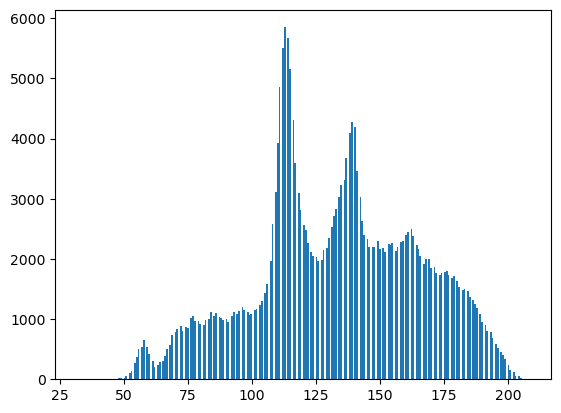

In [17]:
y,x,_=plt.hist(im_org.ravel(), bins=256)

8.- Use the histrogram function to find the most common rang of intensities

In [18]:
h[0][np.argmax(h[0])]

5848.0

### Pixel values and image coordinate systems 

9.- The value of a pixel can be examined by:

In [19]:
r=100
c=50
im_val=im_org[r,c]
print(f"The pixel value at (r,c)=({r},{c}) is: {im_val}")

The pixel value at (r,c)=(100,50) is: 108


In [20]:
r=110
c=90
im_val=im_org[r,c]
print(f"The pixel value at (r,c)=({r},{c}) is: {im_val}")

The pixel value at (r,c)=(110,90) is: 120


10.- Since the image is represented as a NumPy array, the usual slicing operatoins can be used

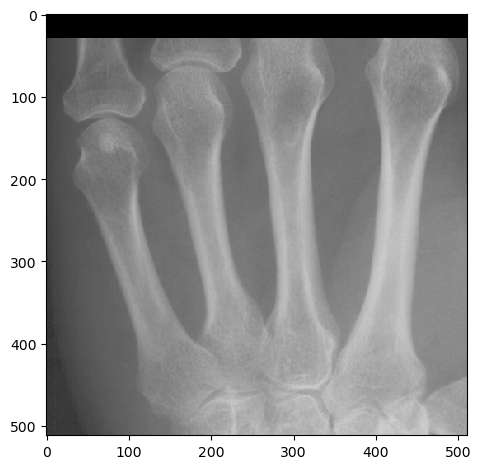

In [21]:
im_org[:30]=0
io.imshow(im_org)
io.show()

11.- A mask is a binary image of the same size as the original image, where the values are either 0 or 1.

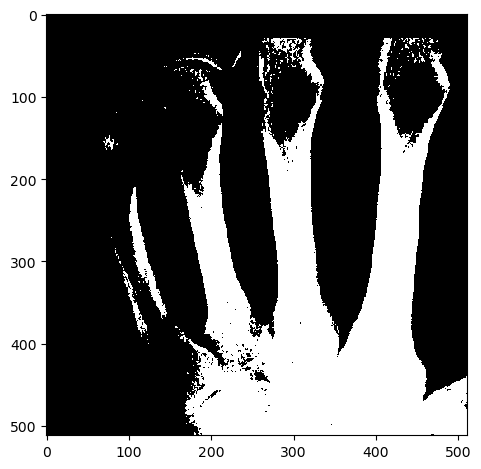

In [22]:
mask=im_org>150
io.imshow(mask)
io.show()

a mask is created from the original image. Where are the values 1 and where are they 0? 

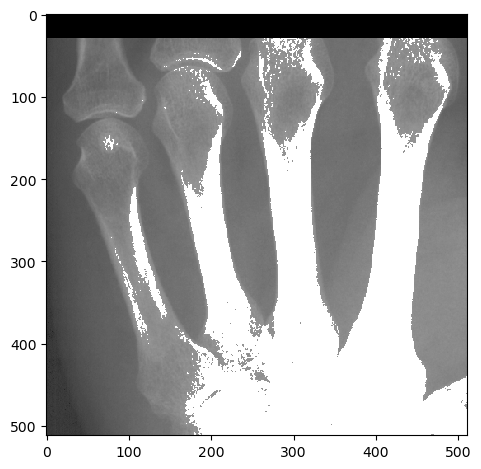

In [23]:
im_org[mask]=255
io.imshow(im_org)
io.show()

### Color images

In a color, each image is defined using three values: R (red), G (green) and B (blue).

12.- Read color image

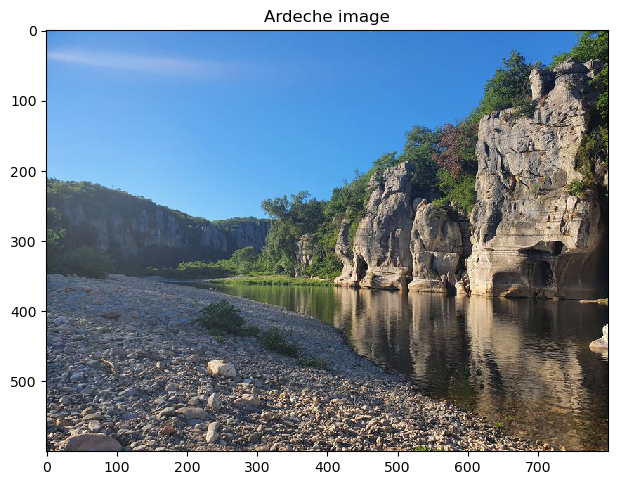

In [24]:
im_name2="ardeche.jpg"
im_org2=io.imread(in_dir+im_name2)
io.imshow(im_org2)
plt.title('Ardeche image')
io.show()

13.- What is the (R,G,B) pixel values at (r,c)=(110,90)? 

In [25]:
r=110;
c=90;
im_org2[r,c]

array([119, 178, 238], dtype=uint8)

Try to use NumPy slicing to color the ipper half of the photo gree

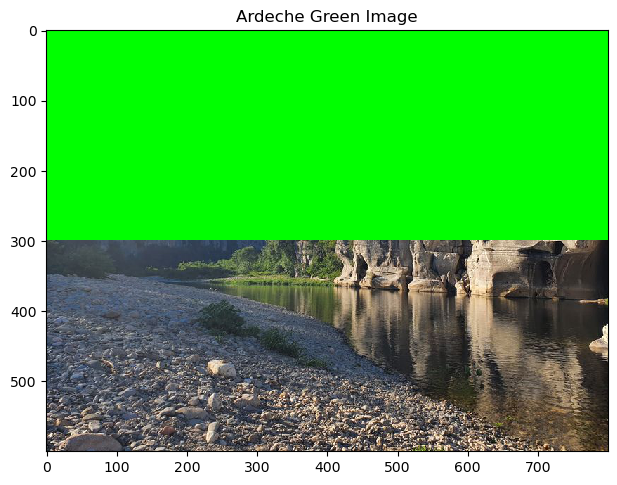

In [26]:
r2=int(im_org2.shape[0]/2)
im_org2[:r2,:,:]=[0,255,0]
io.imshow(im_org2)
plt.title('Ardeche Green Image')
io.show()

## Working with your own image

14.- We are going to rescale our image

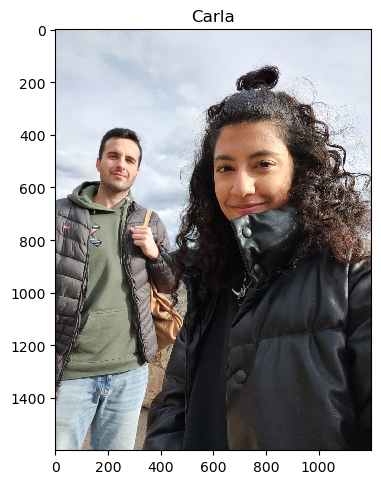

In [27]:
im_name3="carla.JPEG"
im_org3=io.imread(in_dir+im_name3)
io.imshow(im_org3)
plt.title('Carla')
io.show()

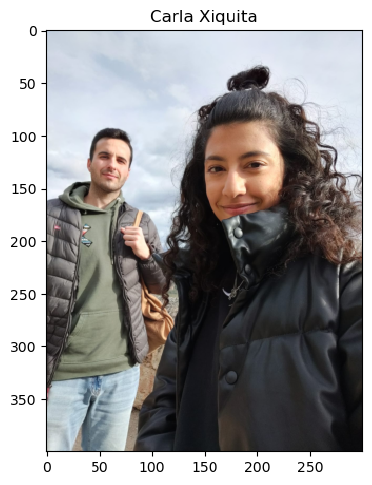

In [28]:
image_rescaled=rescale(im_org3, 0.25, anti_aliasing=True, channel_axis=2)
io.imshow(image_rescaled)
plt.title('Carla Xiquita')
io.show()

In [29]:
print(im_org3.dtype)
print(im_org3.shape)
print(image_rescaled.dtype)
print(image_rescaled.shape)

uint8
(1599, 1200, 3)
float64
(400, 300, 3)


In [30]:
im_org3[r,c]

array([208, 218, 230], dtype=uint8)

The resize functions can scale the height and width of the image with different scales

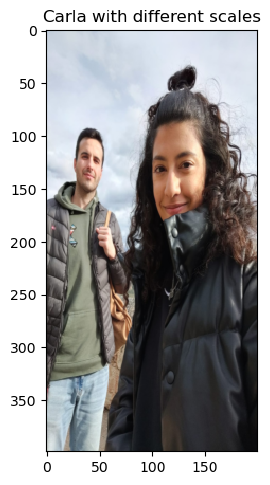

In [31]:
image_resized=resize(im_org3, (im_org3.shape[0]//4, im_org3.shape[1]//6), anti_aliasing=True)
io.imshow(image_resized)
plt.title('Carla with different scales')
io.show()

15.- Try to find a way to automatically scale your image so the resulting width is always equal to 400

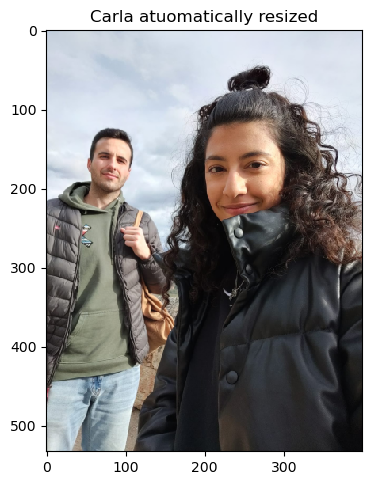

In [32]:
#r0=im_org3.shape[0]
#c0=im_org3.shape[1]
c=400
a=int(im_org3.shape[1]/400)
image_resized=resize(im_org3,(im_org3.shape[0]//a, c), anti_aliasing=True)
io.imshow(image_resized)
plt.title('Carla atuomatically resized')
io.show()

16.- Transform image into a gray-level image

float64


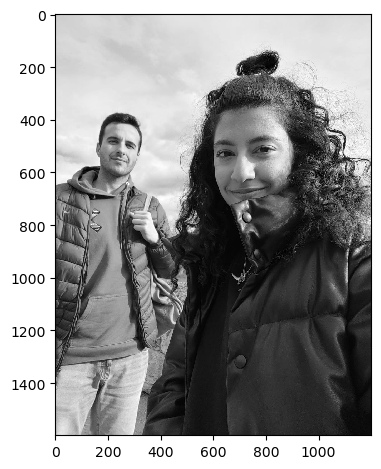

In [33]:
im_gray=color.rgb2gray(im_org3)
io.imshow(im_gray)
print(im_gray.dtype)

We are foarcing the pixel type back into unsigned bytes due to rgb2gray returns the pixel type as floating point numbers

uint8


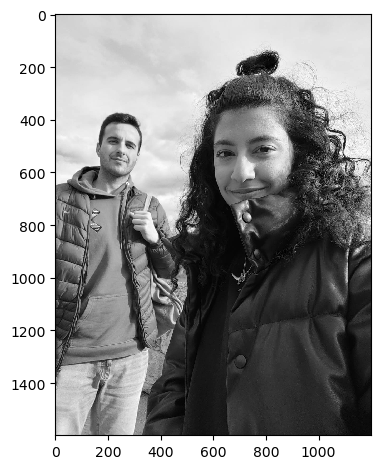

In [34]:
im_byte=img_as_ubyte(im_gray)
io.imshow(im_byte)
print(im_byte.dtype)

17.- Compute and show the histogram of your own image

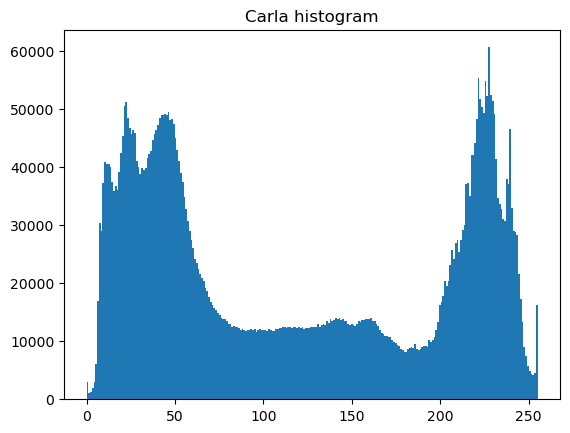

In [35]:
plt.hist(im_org3.ravel(),bins=256)
plt.title('Carla histogram')
io.show()

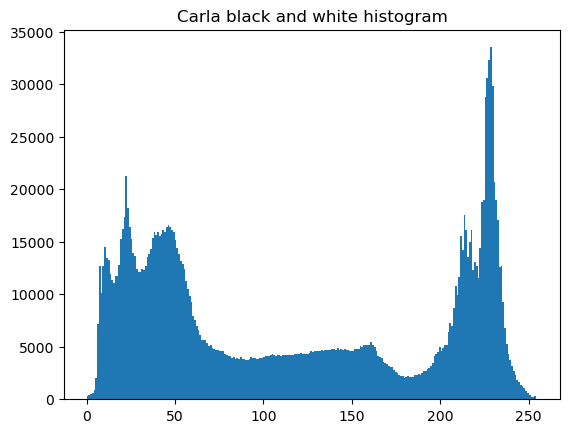

In [36]:
plt.hist(im_byte.ravel(),bins=256)
plt.title('Carla black and white histogram')
io.show()

### Color channels

19.- DTU Compute

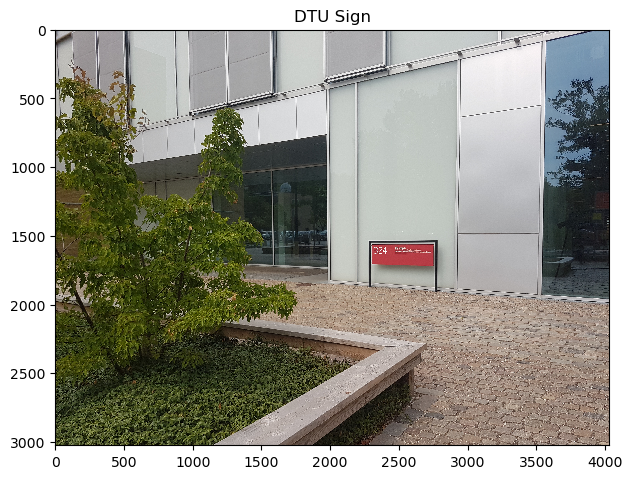

In [37]:
im_name="DTUSign1.jpg"
im_org=io.imread(in_dir+im_name)
io.imshow(im_org)
plt.title('DTU Sign')
io.show()

We are going to visualize the R, G, B components of the image

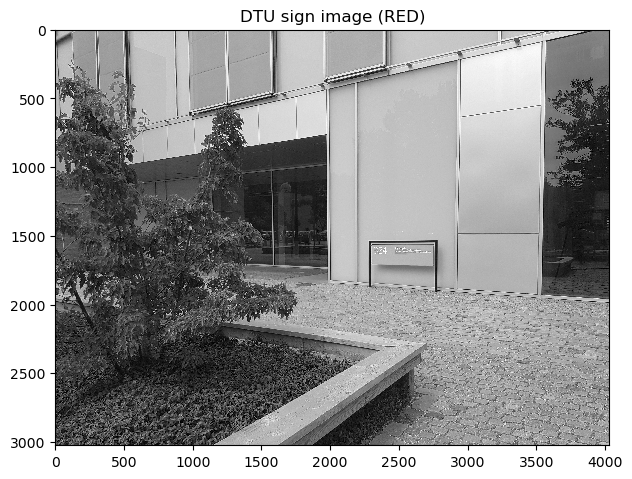

In [38]:
r_comp=im_org[:,:,0]
io.imshow(r_comp)
plt.title('DTU sign image (RED)')
io.show()

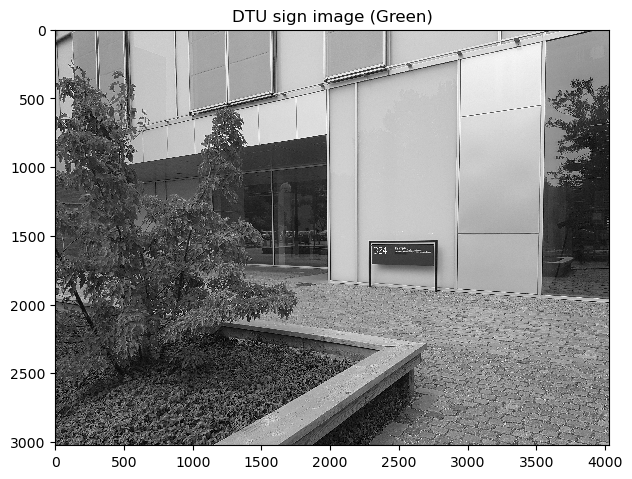

In [39]:
g_comp=im_org[:,:,1]
io.imshow(g_comp)
plt.title('DTU sign image (Green)')
io.show()

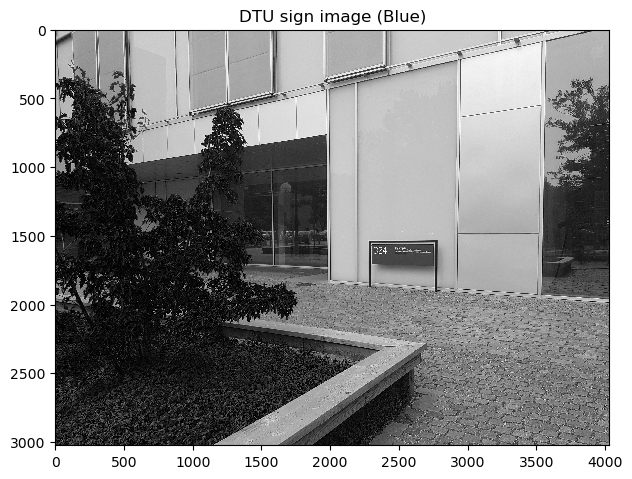

In [40]:
b_comp=im_org[:,:,2]
io.imshow(b_comp)
plt.title('DTU sign image (Blue)')
io.show()

### Simple Image Manipulations

20.- Create a black rectangle in the image

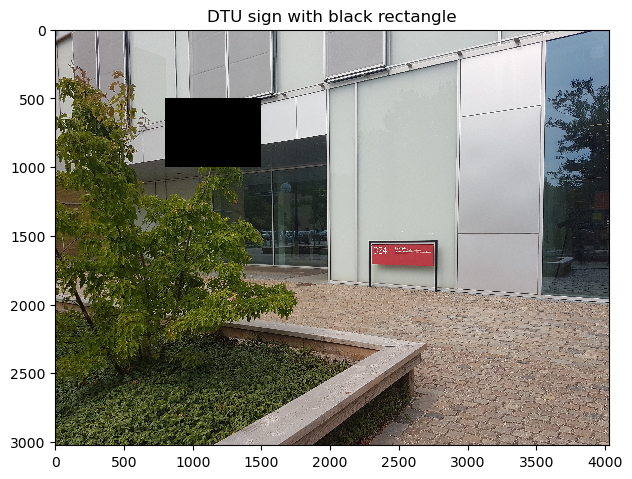

In [41]:
im_org[500:1000,800:1500,:]=0
io.imshow(im_org)
plt.title('DTU sign with black rectangle')
io.show()

Save the image:

In [42]:
io.imsave('data\DTU_Sign_Rectangle.PNG',im_org)

In [43]:
io.imsave('data\DTU_Sign_Rectangle.jpg',im_org)

21.- Try to create a blue rectangle around the DTU Compute sign and save the resulting image

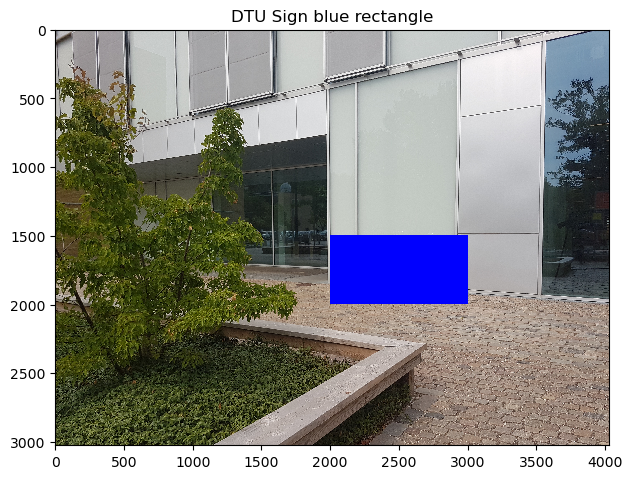

In [44]:
im_org=io.imread(in_dir+im_name)
im_org[1500:2000,2000:3000,:]=0
im_org[1500:2000,2000:3000,2]=255
io.imshow(im_org)
plt.title('DTU Sign blue rectangle')
io.show()
io.imsave('data\DTU_Sign_BlueRectangle.PNG',im_org)

22.- Try to automatically create an image based on metacarpals.png where the
bones are colored blue. You should use color.gray2rgb and pixel masks.

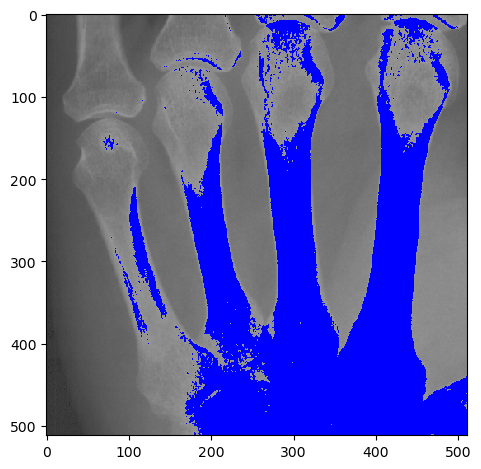

In [45]:
im_org=io.imread(in_dir+'metacarpals.png')
im_mod=color.gray2rgb(im_org)
mask=im_org>150
im_mod[mask,0]=0
im_mod[mask,1]=0
im_mod[mask,2]=255
io.imshow(im_mod)
io.show()

### Advanced Image Visualization

23.- Learning to use the tool profile_line

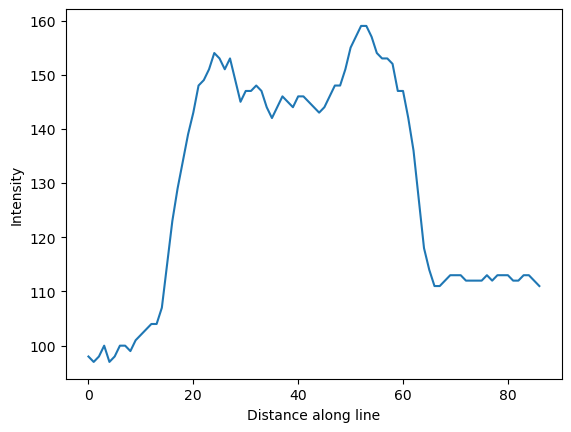

In [46]:
im_org=io.imread(in_dir+'metacarpals.png')
p=profile_line(im_org, (342,77), (320,160))
plt.plot(p)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.show()

24.- An image can also be viewed as a landscape, where the height is equal to the gray level

<function matplotlib.pyplot.show(close=None, block=None)>

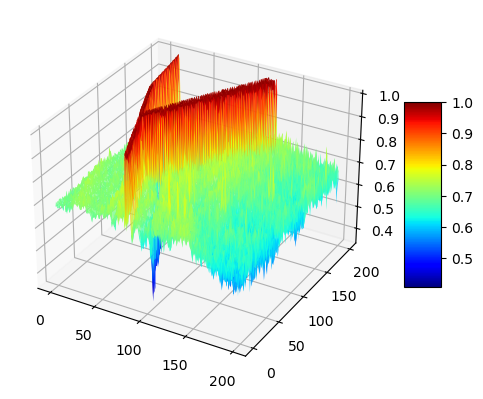

In [47]:
in_dir= "data/"
im_name= "road.png"
im_org= io.imread(in_dir+im_name)
im_gray= color.rgb2gray(im_org)
ll=200
im_crop=im_gray[40:40+ll,150:150+ll]
xx,yy=np.mgrid[0:im_crop.shape[0],0:im_crop.shape[1]]
fig,ax=plt.subplots(subplot_kw={"projection":"3d"})
surf=ax.plot_surface(xx,yy,im_crop,rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0)
fig.colorbar(surf,shrink=0.5,aspect=5)
plt.show

### DICOM images

25.- Readind a DICOM image

In [48]:
in_dir="data/"
im_name="1-442.dcm"
ds=dicom.dcmread(in_dir+im_name)
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 174
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 61.7.148187188172271071649499494197343400503
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 61.7.148187188172271071649499494197343400503
(0008, 0020) Study Date                          DA: '20140914'
(0008, 0030) Study Time                          TM: ''
(0008, 0050) Accession N

26.- We can get access to the pixel values of the DICOM slice:

In [49]:
im=ds.pixel_array
print(im.shape)
print(im.dtype)

(512, 512)
int16


27.- Visualize the slice:

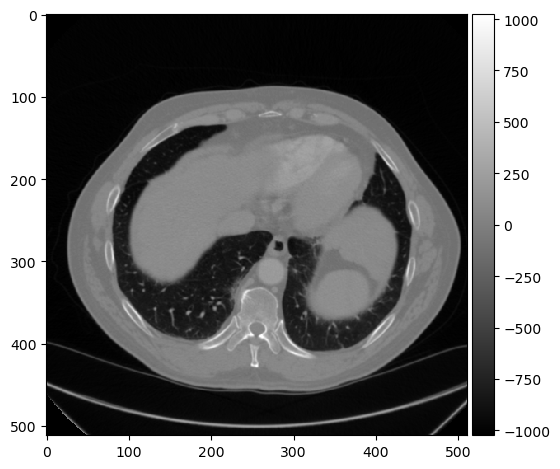

In [50]:
io.imshow(im, vmin=-1024, vmax=1024, cmap='gray')
io.show()